In [10]:
# 03_modeling.ipynb

import numpy as np
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../scripts')

from models import *
from eda import show_data

df = show_data('../data/heart-disease-scaled.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.982275,1,3,0.984117,-0.208961,1,0,0.001716,0,1.315709,0,0,1,1
1,-1.871092,1,2,0.007591,0.172417,0,1,1.635162,0,2.486915,0,0,2,1
2,-1.432112,0,1,0.007591,-0.859547,0,0,0.972954,0,0.437305,2,0,2,1
3,0.214061,1,1,-0.643426,-0.141659,0,1,1.237837,0,-0.148297,2,0,2,1
4,0.323805,0,0,-0.643426,2.505551,0,1,0.575629,1,-0.343498,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.323805,0,0,0.658608,-0.029489,0,1,-1.190258,1,-0.733900,1,0,3,0
279,-0.993133,1,3,-1.294442,0.486493,0,1,-0.792933,0,0.242104,1,0,3,0
280,1.530999,1,0,0.919015,-1.106321,1,1,-0.395609,0,2.389314,1,2,3,0
281,0.323805,1,0,0.007591,-2.497228,0,1,-1.543436,1,0.242104,1,1,3,0


In [11]:
X_train, X_test, y_train, y_test = split_test(df)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
202,0.762785,1,0,-0.643426,0.396757,0,1,-0.439756,1,2.584515,1,1,3
25,0.543295,1,2,1.309625,-0.680075,1,1,0.310746,0,0.632506,2,0,2
86,0.433550,0,0,-1.945459,0.127549,0,0,-1.234405,0,0.046903,1,0,2
140,-1.102878,0,2,-0.773629,-0.007055,0,1,-0.042431,0,-0.636300,1,1,2
179,0.653040,1,0,0.007591,0.239719,0,1,-0.263167,1,0.437305,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.543295,1,0,2.611659,1.877400,0,0,-0.439756,1,2.389314,0,0,3
71,-0.334664,1,0,0.658608,0.419191,0,0,1.591015,1,-0.929101,2,0,2
106,1.092019,0,2,0.658608,1.585758,0,1,-0.748786,0,-0.733900,2,0,3
270,0.104316,0,0,-0.122612,-0.837113,0,2,-0.881228,1,1.022908,1,1,3


In [12]:
y_test

9      1
246    0
139    1
207    0
75     1
271    0
262    0
159    0
42     1
168    0
46     1
265    0
155    1
244    0
5      1
215    0
249    0
181    0
229    0
33     1
109    1
60     1
68     1
216    0
56     1
93     1
77     1
158    0
269    0
108    1
245    0
192    0
175    0
45     1
79     1
206    0
66     1
82     1
266    0
127    1
30     1
22     1
24     1
143    1
73     1
200    0
222    0
253    0
90     1
209    0
167    0
173    0
92     1
6      1
125    1
264    0
147    1
Name: target, dtype: int64

In [13]:
fit_score(X_train, X_test, y_train, y_test)

{'KNN': 0.7894736842105263,
 'Logistic Regression': 0.7719298245614035,
 'Random Forest': 0.8070175438596491}

In [14]:
# Tuning the models

KNN(X_train, X_test, y_train, y_test)

# the maximum KNN score on the test data: 80.7%, n_neighbors = 5 seems best

,train_scores,test_scores
0,1.000000,0.736842
1,0.867257,0.736842
2,0.871681,0.771930
3,0.871681,0.736842
4,0.858407,0.789474
5,0.853982,0.807018
6,0.853982,0.807018
7,0.862832,0.754386
8,0.853982,0.807018
9,0.853982,0.789474


In [15]:
# Tuning models with with RandomizedSearchCV

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 30, 2),
           "min_samples_leaf": np.arange(1, 30, 2)}

rs_lg =  rs_cv(LogisticRegression(), log_reg_grid, X_train, X_test, y_train, y_test)

rs_lg.best_params_, rs_lg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'solver': 'liblinear', 'C': np.float64(4.281332398719396)},
 0.7543859649122807)

In [16]:

rs_rfc = rs_cv(RandomForestClassifier(), rf_grid, X_train, X_test, y_train, y_test)

rs_rfc.best_params_, rs_rfc.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'n_estimators': np.int64(760),
  'min_samples_split': np.int64(18),
  'min_samples_leaf': np.int64(19),
  'max_depth': 10},
 0.8070175438596491)

In [17]:
# Tuning a model with GridSearchCV

gs_lg = grid_search(LogisticRegression(), log_reg_grid, X_train, X_test, y_train, y_test)

gs_lg.best_params_, gs_lg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': np.float64(4.281332398719396), 'solver': 'liblinear'},
 0.7543859649122807)

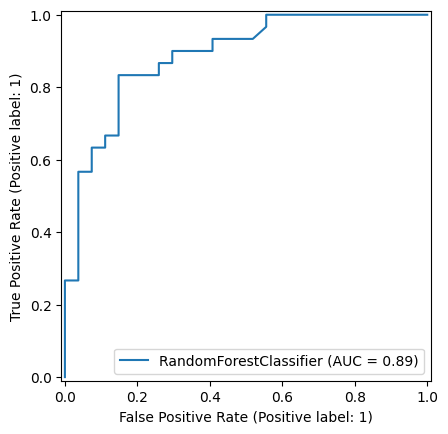

In [18]:
# ROC Curve

roc_curve(RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42), X_train, X_test, y_train, y_test)

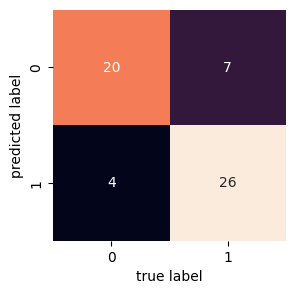

In [19]:
y_preds = predict(RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42), X_train, X_test, y_train, y_test)

c_matrix(y_test, y_preds)

In [20]:
# Classification report

class_report(y_test, y_preds)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.79      0.87      0.83        30

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [21]:
cv_acc, cv_precision, cv_recall, cv_f1 = cvscore(RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42), df)

{"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1 Score": cv_f1}

{'Accuracy': np.float64(0.8054511278195488),
 'Precision': np.float64(0.8169048721510521),
 'Recall': np.float64(0.8483870967741935),
 'F1 Score': np.float64(0.8305960921967234)}